In [1]:
import tensorflow.keras.losses as losses

def iou(y_true, y_pred):
    
    smooth = 1.  # 0으로 나누는 것 방지
    
    # Flatten
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
    
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection
    
    score = intersection / (union + smooth)
    return score

def dice_coef(y_true, y_pred):
    
    smooth = 1.  # 0으로 나누는 것 방지
    
    # Flatten
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
    
    intersection = tf.reduce_sum(y_true * y_pred)
    
    score = (2 * intersection) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)
    return score

def dice_loss(y_true, y_pred):
    
    loss = 1 - dice_coef(y_true, y_pred)

    return loss

def bce_dice_loss(y_true, y_pred):
    
    loss = 1. * losses.binary_crossentropy(y_true,y_pred) + 1. * dice_loss(y_true, y_pred)

    return loss

In [29]:
from tensorflow.keras.models import load_model
model = load_model('Final_model.h5', custom_objects={'bce_dice_loss':bce_dice_loss, 'iou':iou})

In [30]:
import numpy as np

def Predict_model(images):
    
    image_datas = np.zeros((len(images), 256,256,3))
    
    for i in range(len(images)):
        image_datas[i] = images[i][:,:,:3]
        
    preds = model.predict(image_datas)
    
    for i in range(len(images)):
        preds[i] = preds[i]
        
    return preds

In [31]:
import matplotlib.pyplot as plt
import os

## image, label 설정
test_img_path_24 = 'D:/cube_resized/86/24/'

num_24 = len(next(os.walk(test_img_path_24))[2])

test_images_24 = np.zeros((num_24,256,256,3))

for i in range(num_24):
    test_images_24[i] = plt.imread(test_img_path_24 + next(os.walk(test_img_path_24))[2][i])[:,:,:3]

In [32]:
test_labels_24 = Predict_model(test_images_24)

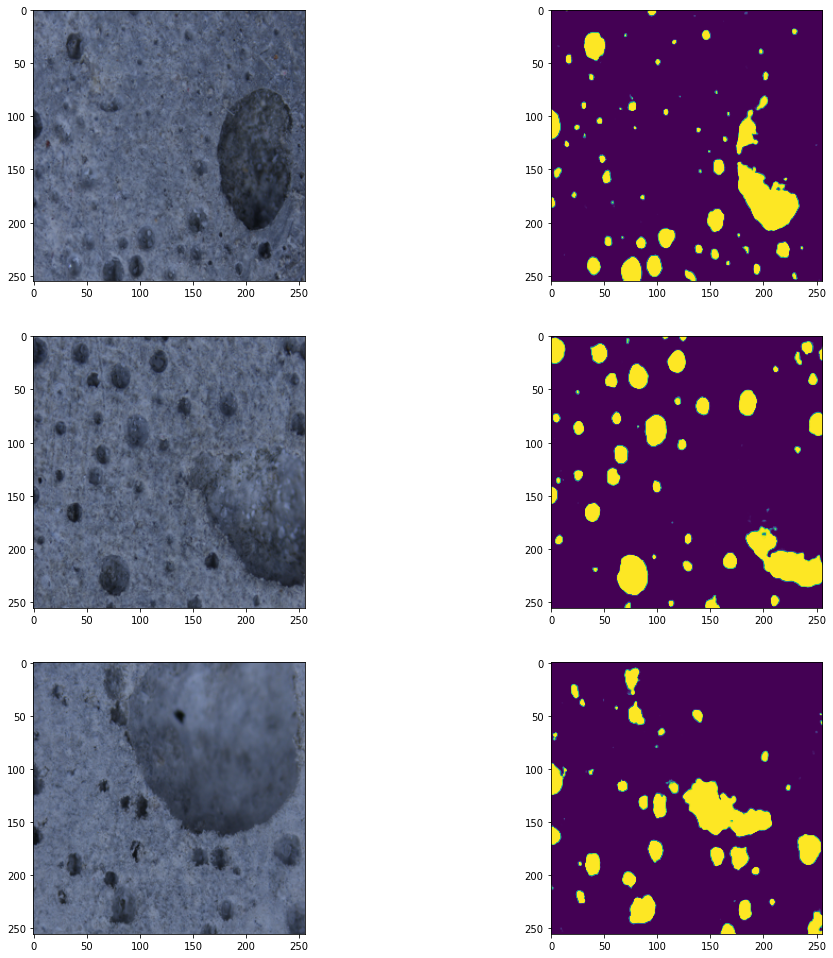

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(17,17))
plt.subplot(3,2,1)
plt.imshow(test_images_24[186])
plt.subplot(3,2,2)
plt.imshow(test_labels_24[186])
plt.subplot(3,2,3)
plt.imshow(test_images_24[190])
plt.subplot(3,2,4)
plt.imshow(test_labels_24[190])
plt.subplot(3,2,5)
plt.imshow(test_images_24[285])
plt.subplot(3,2,6)
plt.imshow(test_labels_24[285])

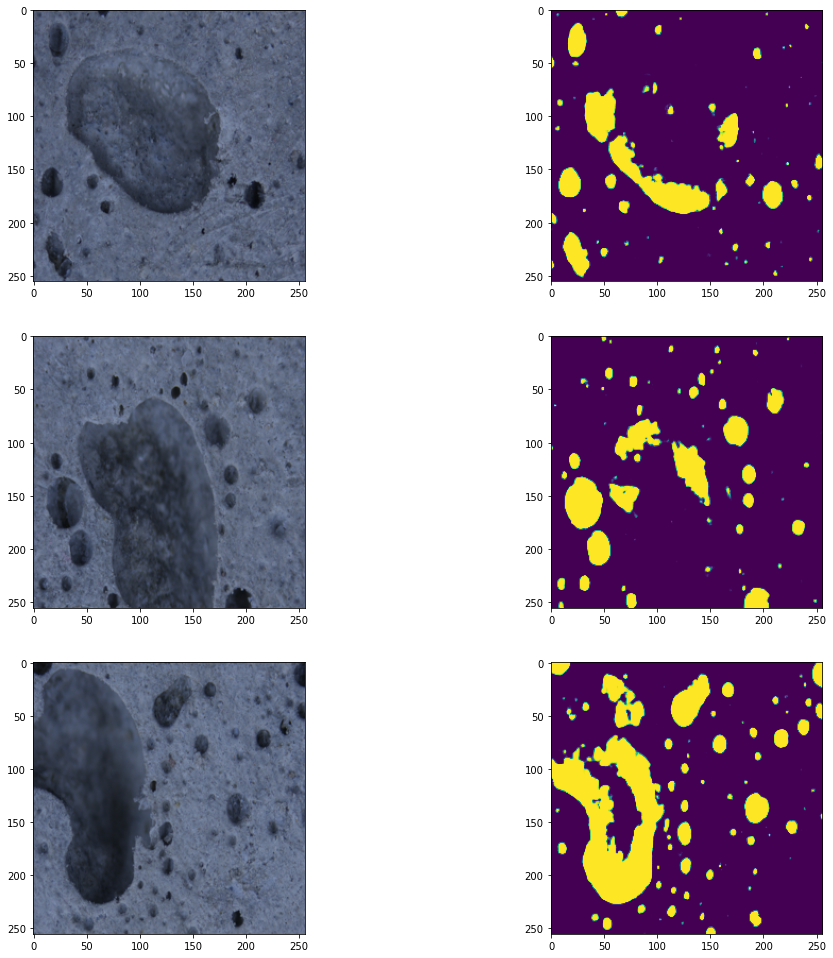

In [34]:
plt.figure(figsize=(17,17))
plt.subplot(3,2,1)
plt.imshow(test_images_24[487])
plt.subplot(3,2,2)
plt.imshow(test_labels_24[487])
plt.subplot(3,2,3)
plt.imshow(test_images_24[371])
plt.subplot(3,2,4)
plt.imshow(test_labels_24[371])
plt.subplot(3,2,5)
plt.imshow(test_images_24[728])
plt.subplot(3,2,6)
plt.imshow(test_labels_24[728])

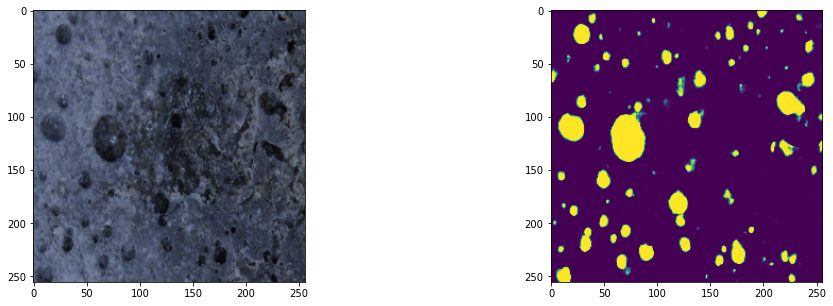

In [12]:
plt.figure(figsize=(17,17))
plt.subplot(3,2,1)
plt.imshow(test_images_24[870])
plt.subplot(3,2,2)
plt.imshow(test_labels_24[870])

In [6]:
porosity_24 = []
for i in range(test_labels_24.shape[0]):
    cnt = 0
    for j in range(256):
        for k in range(256):
            cnt += test_labels_24[i][j][k]
                
    porosity_24.append(cnt/(256*256)*100)
    
porosity_24

[array([11.71003878]),
 array([11.26239896]),
 array([11.85944751]),
 array([11.8252784]),
 array([8.55443627]),
 array([7.56040514]),
 array([15.54417312]),
 array([9.45212245]),
 array([17.51512885]),
 array([6.86244145]),
 array([7.25164637]),
 array([6.99970573]),
 array([5.51407374]),
 array([6.49034455]),
 array([13.23065907]),
 array([8.99096206]),
 array([12.75094002]),
 array([9.48806331]),
 array([11.03014201]),
 array([9.64327976]),
 array([10.20964161]),
 array([11.4805758]),
 array([9.41556692]),
 array([13.93197179]),
 array([6.09422848]),
 array([13.6081472]),
 array([11.31326184]),
 array([9.58376527]),
 array([9.72213969]),
 array([13.31474334]),
 array([14.93993849]),
 array([6.4734973]),
 array([5.91634288]),
 array([9.89553928]),
 array([9.17565152]),
 array([6.10628203]),
 array([11.00468859]),
 array([11.80155352]),
 array([16.1906451]),
 array([16.54590815]),
 array([12.61880398]),
 array([30.76168299]),
 array([13.00336272]),
 array([8.5483335]),
 array([7.66697

In [7]:
np.average(porosity_24)

9.273769395437768

In [8]:
with open('last_24.txt','w',encoding='UTF-8') as f:
    for name in porosity_24:
        f.write(str(name[0])+'\n')

In [7]:
## image, label 설정
test_img_path_35 = 'D:/cube_resized/86/35/'

num_35 = len(next(os.walk(test_img_path_35))[2])

test_images_35 = np.zeros((num_35,256,256,3))

for i in range(num_35):
    test_images_35[i] = plt.imread(test_img_path_35 + next(os.walk(test_img_path_35))[2][i])[:,:,:3]

In [11]:
test_labels_35 = Predict_model(test_images_35)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:GPU:0 to /job:localhost/replica:0/task:0/device:CPU:0 in order to run TensorDataset: Dst tensor is not initialized. [Op:TensorDataset]

In [11]:
porosity_35 = []
for i in range(test_labels_35.shape[0]):
    cnt = 0
    for j in range(256):
        for k in range(256):
            cnt += test_labels_35[i][j][k]
    porosity_35.append(cnt/(256*256)*100)
    
porosity_35

[array([5.49613535]),
 array([3.58350351]),
 array([2.87063401]),
 array([1.45363798]),
 array([4.20097969]),
 array([4.88985442]),
 array([2.93187685]),
 array([2.51807198]),
 array([0.72369929]),
 array([1.85690988]),
 array([2.30235364]),
 array([2.30139345]),
 array([1.4896879]),
 array([2.5718933]),
 array([1.22762229]),
 array([1.15008708]),
 array([3.47703323]),
 array([4.81376909]),
 array([2.31868327]),
 array([5.93748763]),
 array([2.81891525]),
 array([1.51430825]),
 array([2.5297828]),
 array([2.34432686]),
 array([2.18920261]),
 array([4.56911735]),
 array([2.59299371]),
 array([1.32603282]),
 array([2.20353398]),
 array([1.83173474]),
 array([1.92010775]),
 array([2.30331402]),
 array([2.19775811]),
 array([1.19034816]),
 array([1.86483227]),
 array([2.49820314]),
 array([3.06581222]),
 array([3.39553431]),
 array([1.78486537]),
 array([2.17171218]),
 array([5.62117584]),
 array([1.28630102]),
 array([1.69546884]),
 array([2.24801339]),
 array([0.81294319]),
 array([3.729

In [12]:
np.average(porosity_35)

3.102467158108888

In [13]:
with open('last_35.txt','w',encoding='UTF-8') as f:
    for name in porosity_35:
        f.write(str(name[0])+'\n')

In [8]:
import matplotlib.pyplot as plt
import os

## image, label 설정
test_img_path_50 = 'D:/cube_resized/86/50/'

num_50 = len(next(os.walk(test_img_path_50))[2])

test_images_50 = np.zeros((num_50,256,256,3))

for i in range(num_50):
    test_images_50[i] = plt.imread(test_img_path_50 + next(os.walk(test_img_path_50))[2][i])[:,:,:3]

In [ ]:
test_labels_50 = Predict_model(test_images_50)

In [6]:
porosity_50 = []
for i in range(test_labels_50.shape[0]):
    cnt = 0
    for j in range(256):
        for k in range(256):
            cnt += test_labels_50[i][j][k]
    porosity_50.append(cnt/(256*256)*100)
    
porosity_50

[array([2.06174832]),
 array([1.29052727]),
 array([2.0513732]),
 array([1.6216103]),
 array([1.57309435]),
 array([1.58234816]),
 array([1.50580918]),
 array([3.42222489]),
 array([1.74952075]),
 array([2.04802752]),
 array([1.51955048]),
 array([1.14280954]),
 array([2.57955957]),
 array([2.08264086]),
 array([1.25526851]),
 array([0.85548311]),
 array([0.71504093]),
 array([4.87037264]),
 array([2.51006708]),
 array([1.93775967]),
 array([0.93950015]),
 array([1.90651622]),
 array([2.77588367]),
 array([4.92275059]),
 array([0.90830512]),
 array([1.06919045]),
 array([0.63355463]),
 array([2.55102385]),
 array([3.49432155]),
 array([3.34310569]),
 array([2.57071108]),
 array([2.15777643]),
 array([1.6194988]),
 array([1.72505043]),
 array([4.79306057]),
 array([1.99205261]),
 array([1.5256037]),
 array([1.5484795]),
 array([0.97977649]),
 array([0.88280169]),
 array([1.33723449]),
 array([0.75849234]),
 array([1.66748539]),
 array([1.46874692]),
 array([1.94906741]),
 array([2.25245

In [7]:
np.average(porosity_50)

1.7532320886715402

In [8]:
with open('last_50.txt','w',encoding='UTF-8') as f:
    for name in porosity_50:
        f.write(str(name[0])+'\n')

NameError: name 'test_labels_24' is not defined

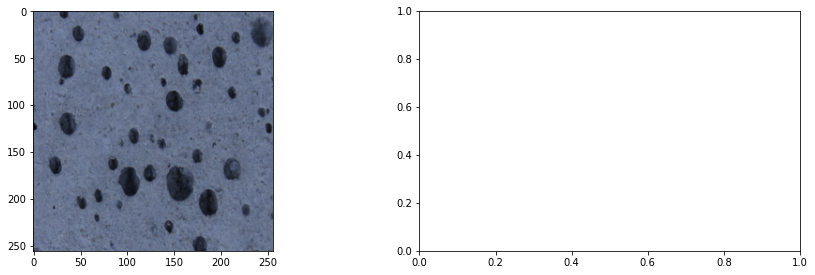

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.imshow(test_images_24[73])
plt.subplot(3,2,2)
plt.imshow(test_labels_24[73])
plt.subplot(3,2,3)
plt.imshow(test_images_35[233])
plt.subplot(3,2,4)
plt.imshow(test_labels_35[233])
plt.subplot(3,2,5)
plt.imshow(test_images_50[465])
plt.subplot(3,2,6)
plt.imshow(test_labels_50[465])

In [35]:
a = np.array([1.2])

In [36]:
a

array([1.2])

In [40]:
a = a.astype(np.float64)

In [42]:
a[0]

1.2

In [16]:
import pandas as pd

a = pd.read_csv('24.txt', encoding='utf-8', names=['24'])
df = pd.DataFrame(a)

In [19]:
b = pd.read_csv('35.txt', encoding='utf-8', names=['35'])
df['35'] = b
c = pd.read_csv('50.txt', encoding='utf-8', names=['50'])
df['50'] = c

In [20]:
df

,24,35,50
0,13.554029,5.797136,2.381885
1,12.514754,3.662278,1.982628
2,13.236845,2.792826,2.406419
3,13.266422,2.364963,2.037105
4,9.006011,4.791782,1.897670
...,...,...,...
938,11.368527,16.589051,NaN
939,9.174104,5.953850,NaN
940,11.915913,7.723764,NaN
941,8.153314,0.547924,NaN


In [21]:
df.to_excel('porosity.xlsx')